In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

# Data

In [2]:
data = pd.read_csv('../Data/all_extracted_data.csv', sep=';')
data

,comment_id,source_id,community_id,publication_id,date_data,hate,comment
0,0,5,pol,124205675,2017-05-05,0,"This board is for the discussion of news, worl..."
1,1,5,pol,259848258,2020-05-31,1,"<p style=""font-size:22px;font-weight:600;"">Che..."
2,2,5,pol,435021015,2023-07-19,1,"Democracy has consequences, chuds."
3,3,5,pol,435020531,2023-07-19,0,Putin has been offered to repopulate Russia wi...
4,4,5,pol,434992101,2023-07-19,0,"Young women are getting cervical cancer, cases..."
...,...,...,...,...,...,...,...
125216,125216,1,samsung,wXhV4W-2ipg,2023-06-21,0,Grande AMLO.
125217,125217,1,samsung,wXhV4W-2ipg,2023-06-21,0,Awesome!
125218,125218,1,samsung,wXhV4W-2ipg,2023-06-21,0,이걸 삼성이 합니다. 정말~대단한 애국 기업입니다 🎊🎊👍👍👍🎊🎊
125219,125219,1,samsung,wXhV4W-2ipg,2023-06-21,0,Korea has hosted Expo in Yeosu 2012. For balan...


In [3]:
def visualize_hate_distribution(data, pieLabel, barLabel):
    HATE = data['hate']
    
    hate_count = pd.Series(HATE).value_counts()
    non_hate_count = hate_count.get(0, 0)
    hate_count = hate_count.get(1, 0)
    non_hate_perc = round((non_hate_count * 100) / (non_hate_count + hate_count), 0)
    hate_perc = round((hate_count * 100) / (non_hate_count + hate_count), 0)
    
    fig, axes = plt.subplots(ncols=2, figsize=(12, 4), dpi=100)
    plt.tight_layout()
    
    data.groupby('hate').count()['comment_id'].plot(kind='pie', ax=axes[0],
                                            labels=[f'Not Hate ({non_hate_perc}%)', f'Hate ({hate_perc}%)'],
                                            colors=['palegreen', 'tomato'])
    
    sns.countplot(x=data['hate'], hue=data['hate'], ax=axes[1], palette=['palegreen', 'tomato'], width=0.6)
    axes[1].set_xticks(range(2))
    axes[1].set_xticklabels([f'Not Hate ({non_hate_count})', f'Hate ({hate_count})'])
    
    axes[0].set_ylabel('')
    axes[1].set_ylabel('')
    axes[0].tick_params(axis='x', labelsize=15)
    axes[0].tick_params(axis='y', labelsize=15)
    axes[1].tick_params(axis='x', labelsize=15)
    axes[1].tick_params(axis='y', labelsize=15)
    
    axes[0].set_title(pieLabel, fontsize=13)
    axes[1].set_title(barLabel, fontsize=13)

    plt.show()

# Distribucion general de hate en todos los datos extraidos

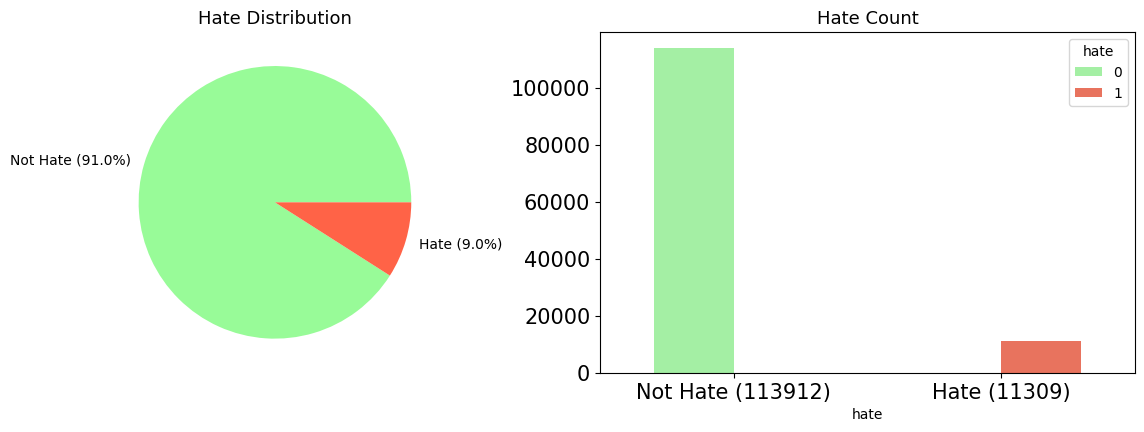

In [4]:
visualize_hate_distribution(data, 'Hate Distribution', 'Hate Count')

# Distribución de Hate por cada red social

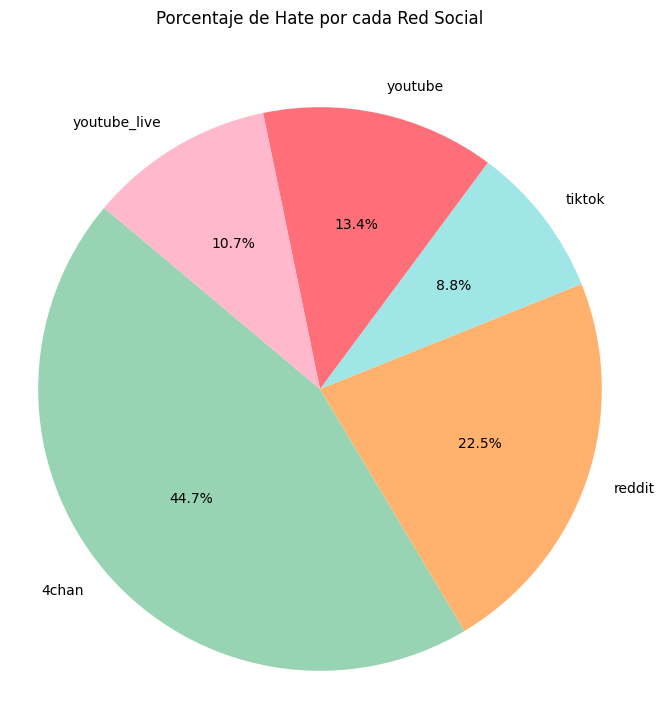

In [5]:
source_names = {
    1: 'youtube_live',
    2: 'youtube',
    3: 'reddit',
    4: 'tiktok',
    5: '4chan',
    6: 'instagram'
}

source_colors = {
    'youtube': '#FF6F79',
    'youtube_live': '#FFB8CC',
    'reddit': '#FFB26E',
    'tiktok': '#A0E6E6',
    '4chan': '#98D4B3',
    'instagram': '#F39CC3'
}


# Create a copy of the DataFrame to avoid modifying the original
data_copy = data.copy()

data_copy['source_id'] = data_copy['source_id'].map(source_names)

total_hate_comments = data_copy[data_copy['hate'] == 1].groupby('source_id').size()

total_comments_by_source = data_copy.groupby('source_id').size()

percentage_hate_by_source = (total_hate_comments / total_comments_by_source) * 100

plt.figure(figsize=(8, 8))
plt.pie(percentage_hate_by_source, labels=percentage_hate_by_source.index, autopct='%1.1f%%', startangle=140, colors=[source_colors[source] for source in percentage_hate_by_source.index])
plt.title('Porcentaje de Hate por cada Red Social', y=1.08)
plt.axis('equal') 
plt.show()

# Distribución de Hate por Dia de la semana

Se añade la columna de dia de la semana

In [6]:
data['date_data'] = data['date_data'].astype(str)
data['date_data'] = pd.to_datetime(data['date_data'], errors='coerce')
data['day_of_week'] = data['date_data'].dt.day_name()

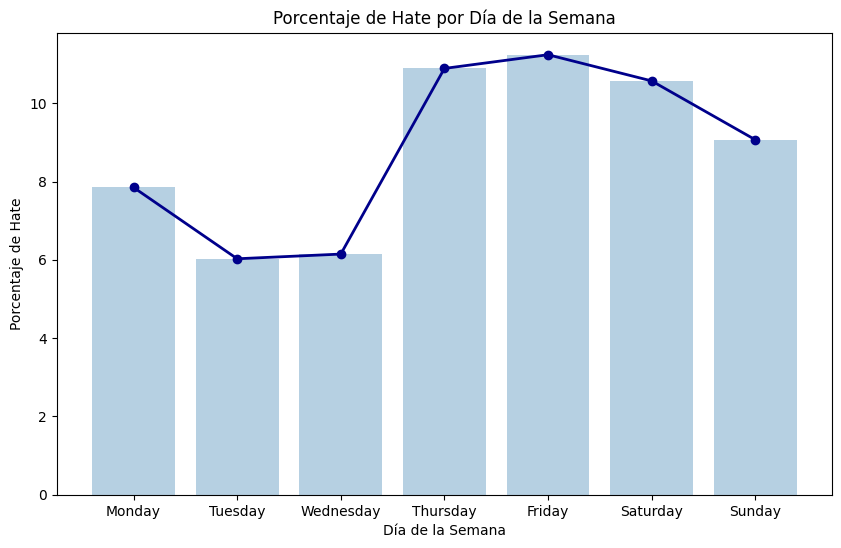

In [7]:
total_hate_comments_by_day = data[data['hate'] == 1].groupby('day_of_week').size()
total_comments_by_day = data.groupby('day_of_week').size()

# Calcula el porcentaje de hate por día de la semana.
percentage_hate_by_day = (total_hate_comments_by_day / total_comments_by_day) * 100

# Ordena los días de la semana para que aparezcan en orden cronológico en el gráfico.
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
percentage_hate_by_day = percentage_hate_by_day.reindex(days_of_week)

color_bars = '#B6D0E2'
color_line = '#00008B'

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras en el subplot
ax.bar(days_of_week, percentage_hate_by_day, color=color_bars)
ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Porcentaje de Hate')
ax.set_title('Porcentaje de Hate por Día de la Semana')

# Agregar la línea que muestra el porcentaje de hate
ax.plot(days_of_week, percentage_hate_by_day, marker='o', color=color_line, linestyle='-', linewidth=2)

# Muestra el gráfico con las barras y la línea.
plt.show()

# Distribución de Hate por mes del año

Los colores representan las estaciones del año

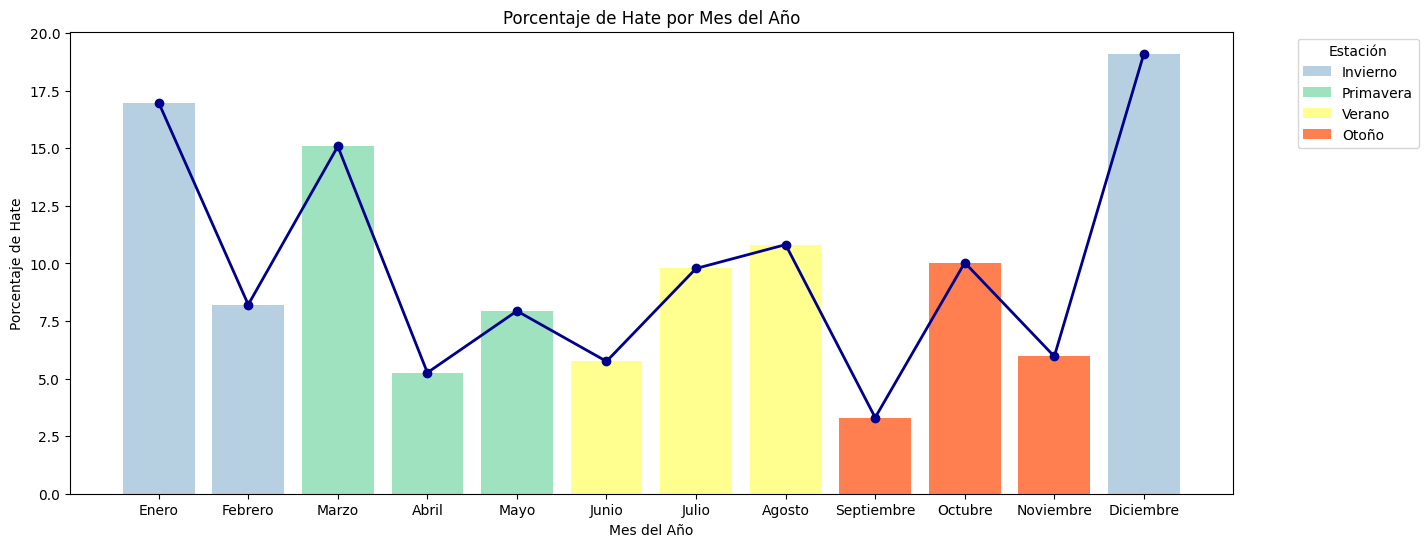

In [8]:
total_hate_comments_by_month = data[data['hate'] == 1].groupby(data['date_data'].dt.month).size()
total_comments_by_month = data.groupby(data['date_data'].dt.month).size()

# Calcula el porcentaje de hate por mes del año.
percentage_hate_by_month = (total_hate_comments_by_month / total_comments_by_month) * 100

# Nombres de los meses
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
colours = ['#B6D0E2', '#B6D0E2', '#9FE2BF', '#9FE2BF', '#9FE2BF', '#FFFF8F', '#FFFF8F', '#FFFF8F', '#FF7F50', '#FF7F50', '#FF7F50', '#B6D0E2']
color_line = '#00008B'

seasons_dict = {
    1: 'Invierno', 2: 'Invierno', 3: 'Primavera', 4: 'Primavera', 5: 'Primavera', 
    6: 'Verano', 7: 'Verano', 8: 'Verano', 9: 'Otoño', 10: 'Otoño', 11: 'Otoño', 12: 'Invierno'
}

# Lista de etiquetas de leyenda y sus colores correspondientes
legend_labels = ['Invierno', 'Primavera', 'Verano', 'Otoño']
legend_colors = ['#B6D0E2', '#9FE2BF', '#FFFF8F', '#FF7F50']

fig, ax = plt.subplots(figsize=(15, 6))

# Gráfico de barras en el subplot
bar_plot = ax.bar(months, percentage_hate_by_month, color=colours)
ax.set_xlabel('Mes del Año')
ax.set_ylabel('Porcentaje de Hate')
ax.set_title('Porcentaje de Hate por Mes del Año')

# Agregar la línea que muestra el porcentaje de hate
line_plot = ax.plot(months, percentage_hate_by_month, marker='o', color=color_line, linestyle='-', linewidth=2)

# Añadir la leyenda al gráfico y ubicarla fuera del gráfico
ax.legend(bar_plot, legend_labels, title="Estación", loc='upper left', bbox_to_anchor=(1.05, 1))

# Personalizar los colores de la leyenda
for i, patch in enumerate(ax.legend_.get_patches()):
    patch.set_facecolor(legend_colors[i])

plt.show()

# Distribución de Hate por año

El eje x se encuentra en el primer gráfico escalado logaritmicamente para apreciar la tendencia creciente en el transcurso de los años

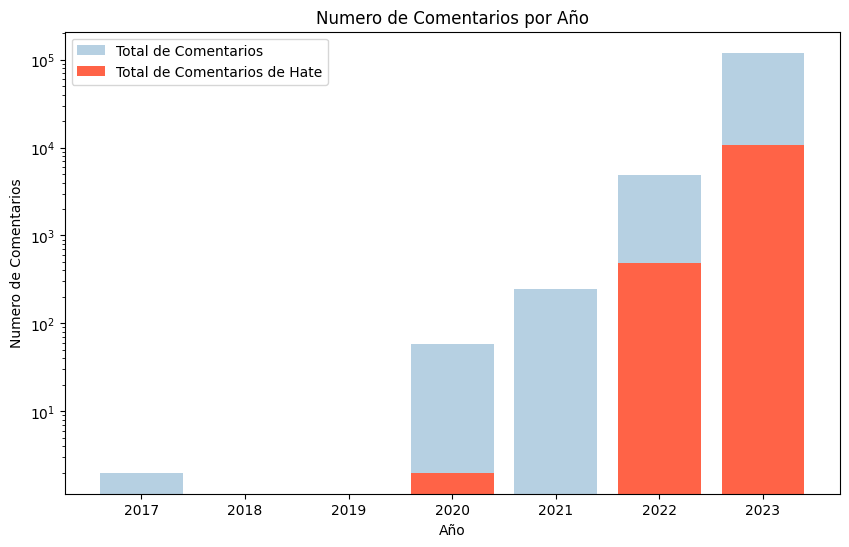

In [9]:
# Filtrar los datos para obtener solo los años requeridos
years_total = [2017, 2020, 2021, 2022, 2023]
years_hate = [2020, 2022, 2023]

total_hate_comments_by_year = data[data['hate'] == 1].loc[data['date_data'].dt.year.isin(years_hate)].groupby(data['date_data'].dt.year).size()
total_comments_by_year = data.loc[data['date_data'].dt.year.isin(years_total)].groupby(data['date_data'].dt.year).size()

color_bars = '#B6D0E2'
color_line = 'tomato'

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para el total de comentarios
ax.bar(years_total, total_comments_by_year, color=color_bars, label='Total de Comentarios')

# Gráfico de barras superpuesto para el total de comentarios de odio
ax.bar(years_hate, total_hate_comments_by_year, color=color_line, label='Total de Comentarios de Hate')

ax.set_xlabel('Año')
ax.set_ylabel('Numero de Comentarios')
ax.set_title('Numero de Comentarios por Año')

plt.yscale('log')
plt.legend()

plt.show()


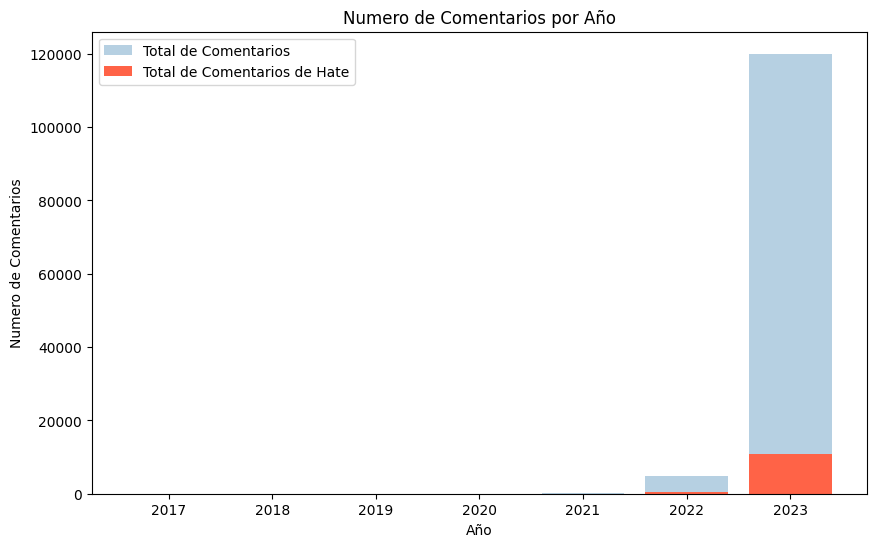

In [10]:
# Filtrar los datos para obtener solo los años requeridos
years_total = [2017, 2020, 2021, 2022, 2023]
years_hate = [2020, 2022, 2023]

total_hate_comments_by_year = data[data['hate'] == 1].loc[data['date_data'].dt.year.isin(years_hate)].groupby(data['date_data'].dt.year).size()
total_comments_by_year = data.loc[data['date_data'].dt.year.isin(years_total)].groupby(data['date_data'].dt.year).size()

color_bars = '#B6D0E2'
color_line = 'tomato'

# Crear la figura y el subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de barras para el total de comentarios
ax.bar(years_total, total_comments_by_year, color=color_bars, label='Total de Comentarios')

# Gráfico de barras superpuesto para el total de comentarios de odio
ax.bar(years_hate, total_hate_comments_by_year, color=color_line, label='Total de Comentarios de Hate')

ax.set_xlabel('Año')
ax.set_ylabel('Numero de Comentarios')
ax.set_title('Numero de Comentarios por Año')

plt.legend()

plt.show()


# Hate por dia Festivo

In [11]:
holiday_data = pd.read_csv('../Data/extra/Holiday_Dates.csv', sep=';')
holiday_data.drop(['Holiday', 'Month', 'Day', 'Year'], axis=1, inplace=True)
holiday_data

,Date
0,2004-01-01
1,2004-01-19
2,2004-02-14
3,2004-02-16
4,2004-04-11
...,...
375,2023-11-24
376,2023-11-25
377,2023-12-24
378,2023-12-25


In [12]:
data['date_data'] = pd.to_datetime(data['date_data'])
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'])

def check_date_in_list(date):
    return 1 if date in holiday_data['Date'].values else 0

data['Holiday'] = data['date_data'].apply(check_date_in_list)
data

,comment_id,source_id,community_id,publication_id,date_data,hate,comment,day_of_week,Holiday
0,0,5,pol,124205675,2017-05-05,0,"This board is for the discussion of news, worl...",Friday,0
1,1,5,pol,259848258,2020-05-31,1,"<p style=""font-size:22px;font-weight:600;"">Che...",Sunday,0
2,2,5,pol,435021015,2023-07-19,1,"Democracy has consequences, chuds.",Wednesday,0
3,3,5,pol,435020531,2023-07-19,0,Putin has been offered to repopulate Russia wi...,Wednesday,0
4,4,5,pol,434992101,2023-07-19,0,"Young women are getting cervical cancer, cases...",Wednesday,0
...,...,...,...,...,...,...,...,...,...
125216,125216,1,samsung,wXhV4W-2ipg,2023-06-21,0,Grande AMLO.,Wednesday,0
125217,125217,1,samsung,wXhV4W-2ipg,2023-06-21,0,Awesome!,Wednesday,0
125218,125218,1,samsung,wXhV4W-2ipg,2023-06-21,0,이걸 삼성이 합니다. 정말~대단한 애국 기업입니다 🎊🎊👍👍👍🎊🎊,Wednesday,0
125219,125219,1,samsung,wXhV4W-2ipg,2023-06-21,0,Korea has hosted Expo in Yeosu 2012. For balan...,Wednesday,0


In [13]:
cross_tab = pd.crosstab(data['hate'], data['Holiday'])

print("Tabla de Frecuencias Cruzadas:")
print(cross_tab)

Tabla de Frecuencias Cruzadas:
Holiday       0     1
hate                 
0        111289  2623
1         11184   125


In [14]:
# Calcular los porcentajes por fila
row_percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

print("\nPorcentajes por fila:")
print(row_percentages)


Porcentajes por fila:
Holiday          0         1
hate                        
0        97.697345  2.302655
1        98.894686  1.105314


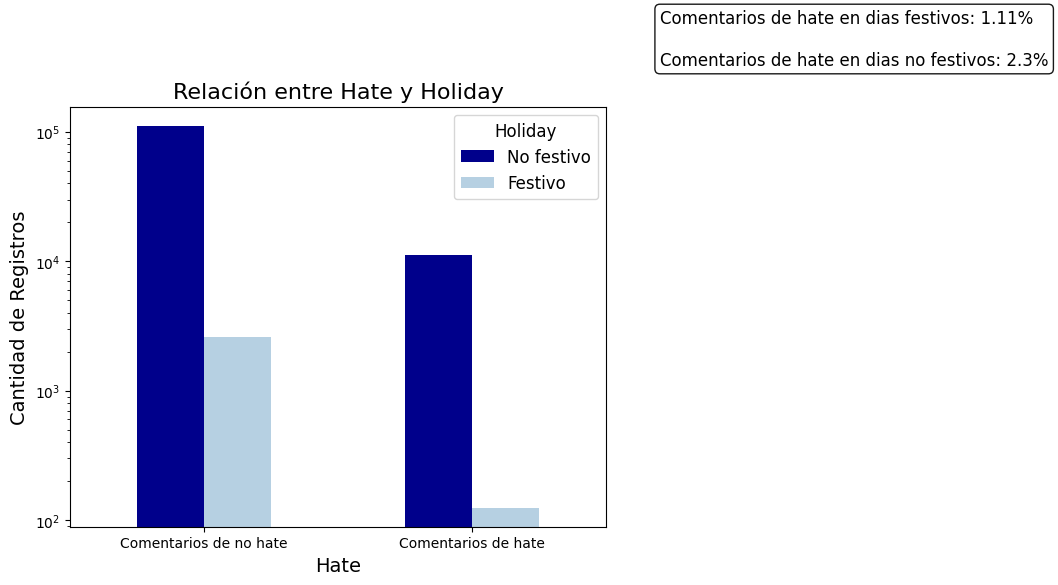

In [15]:
cross_tab = pd.crosstab(data['hate'], data['Holiday'])
cross_tab.columns = ['No festivo', 'Festivo']

x_labels = ['Comentarios de no hate', 'Comentarios de hate']

fig, ax = plt.subplots(figsize=(11, 6))

# Graficar el gráfico de barras
cross_tab.plot(kind='bar', ax=ax, color=['#00008B', '#B6D0E2'])

plt.title("Relación entre Hate y Holiday", fontsize=16)
plt.xlabel("Hate", fontsize=14)
plt.ylabel("Cantidad de Registros", fontsize=14)
plt.xticks(range(len(x_labels)), x_labels, rotation=0)
plt.legend(title="Holiday", title_fontsize=12, fontsize=12)

# Agregar la leyenda de texto fuera del gráfico
extra_legend_text = f"Comentarios de hate en dias festivos: {round(row_percentages.iloc[1, 1], 2)}%\n\nComentarios de hate en dias no festivos: {round(row_percentages.iloc[0, 1], 2)}%"
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.9)
ax.text(1.1, 1.1, extra_legend_text, transform=ax.transAxes, fontsize=12, bbox=bbox_props)

plt.yscale('log')

plt.tight_layout()

plt.show()

Se hace sin aumento exponencial en el eje y para ver la diferencia

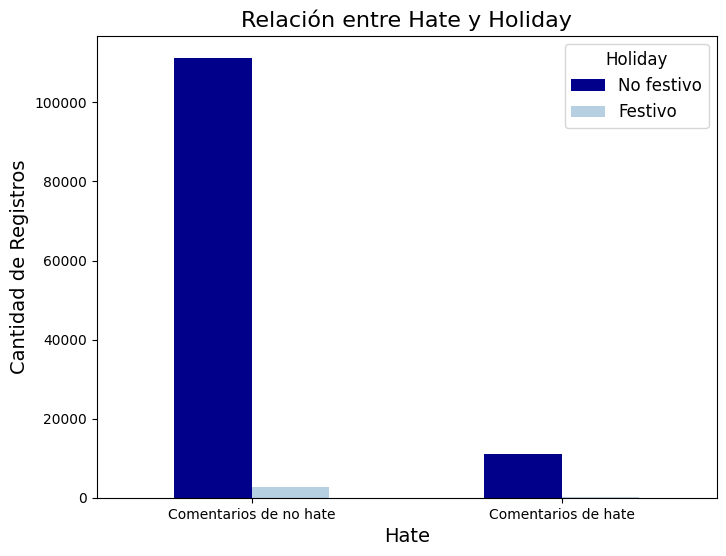

In [16]:
cross_tab.columns = ['No festivo', 'Festivo']

x_labels = ['Comentarios de no hate', 'Comentarios de hate']

cross_tab.plot(kind='bar', figsize=(8, 6), color=['#00008B', '#B6D0E2'])
plt.title("Relación entre Hate y Holiday", fontsize=16)
plt.xlabel("Hate", fontsize=14)
plt.ylabel("Cantidad de Registros", fontsize=14)
plt.xticks(range(len(x_labels)), x_labels, rotation=0)
plt.legend(title="Holiday", title_fontsize=12, fontsize=12)

plt.show()

# Hate e Inflación

Datos de inflacion

In [17]:
inflation_data = pd.read_csv('../Data/extra/CPI.csv')
inflation_data['Yearmon'] = inflation_data['Yearmon'].apply(lambda x: x.split('-', 1)[1])
inflation_data['date_Y-M'] = pd.to_datetime(inflation_data['Yearmon'])
inflation_data['date_Y-M'] = inflation_data['date_Y-M'].dt.to_period('M')
inflation_data.drop('Yearmon', axis=1, inplace=True)
inflation_data

/var/folders/wv/l51jfcl55ys5r78cxp4k6v780000gn/T/ipykernel_15465/4091029806.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  inflation_data['date_Y-M'] = pd.to_datetime(inflation_data['Yearmon'])


,CPI,date_Y-M
0,168.800,2000-01
1,169.800,2000-02
2,171.200,2000-03
3,171.300,2000-04
4,171.500,2000-05
...,...,...
268,287.675,2023-03
269,289.896,2023-04
270,290.125,2023-05
271,292.634,2023-06


Comentarios

In [18]:
data['date_Y-M'] = data['date_data'].dt.to_period('M')
data

,comment_id,source_id,community_id,publication_id,date_data,hate,comment,day_of_week,Holiday,date_Y-M
0,0,5,pol,124205675,2017-05-05,0,"This board is for the discussion of news, worl...",Friday,0,2017-05
1,1,5,pol,259848258,2020-05-31,1,"<p style=""font-size:22px;font-weight:600;"">Che...",Sunday,0,2020-05
2,2,5,pol,435021015,2023-07-19,1,"Democracy has consequences, chuds.",Wednesday,0,2023-07
3,3,5,pol,435020531,2023-07-19,0,Putin has been offered to repopulate Russia wi...,Wednesday,0,2023-07
4,4,5,pol,434992101,2023-07-19,0,"Young women are getting cervical cancer, cases...",Wednesday,0,2023-07
...,...,...,...,...,...,...,...,...,...,...
125216,125216,1,samsung,wXhV4W-2ipg,2023-06-21,0,Grande AMLO.,Wednesday,0,2023-06
125217,125217,1,samsung,wXhV4W-2ipg,2023-06-21,0,Awesome!,Wednesday,0,2023-06
125218,125218,1,samsung,wXhV4W-2ipg,2023-06-21,0,이걸 삼성이 합니다. 정말~대단한 애국 기업입니다 🎊🎊👍👍👍🎊🎊,Wednesday,0,2023-06
125219,125219,1,samsung,wXhV4W-2ipg,2023-06-21,0,Korea has hosted Expo in Yeosu 2012. For balan...,Wednesday,0,2023-06


In [19]:
result_df = pd.merge(data, inflation_data, on='date_Y-M', how='inner')
result_df.drop('date_Y-M', axis=1, inplace=True)

result_df

,comment_id,source_id,community_id,publication_id,date_data,hate,comment,day_of_week,Holiday,CPI
0,0,5,pol,124205675,2017-05-05,0,"This board is for the discussion of news, worl...",Friday,0,244.733
1,9798,5,pol,124205675,2017-05-05,0,"This board is for the discussion of news, worl...",Friday,0,244.733
2,1,5,pol,259848258,2020-05-31,1,"<p style=""font-size:22px;font-weight:600;"">Che...",Sunday,0,256.394
3,9799,5,pol,259848258,2020-05-31,1,"<p style=""font-size:22px;font-weight:600;"">Che...",Sunday,0,256.394
4,2,5,pol,435021015,2023-07-19,1,"Democracy has consequences, chuds.",Wednesday,0,295.672
...,...,...,...,...,...,...,...,...,...,...
121489,89352,1,mrbeast,TQHEJj68Jew,2021-04-24,0,"That was way too close at the end, i hope you ...",Saturday,0,267.054
121490,90305,1,mrbeast,TQHEJj68Jew,2021-04-24,0,"That was way too close at the end, i hope you ...",Saturday,0,267.054
121491,91258,1,mrbeast,TQHEJj68Jew,2021-04-24,0,"That was way too close at the end, i hope you ...",Saturday,0,267.054
121492,92211,1,mrbeast,TQHEJj68Jew,2021-04-24,0,"That was way too close at the end, i hope you ...",Saturday,0,267.054


Podemos afirmar segun este gráfico, que para estos datos, la inflación no es un valor que influya en la cantidad de hate en redes sociales.

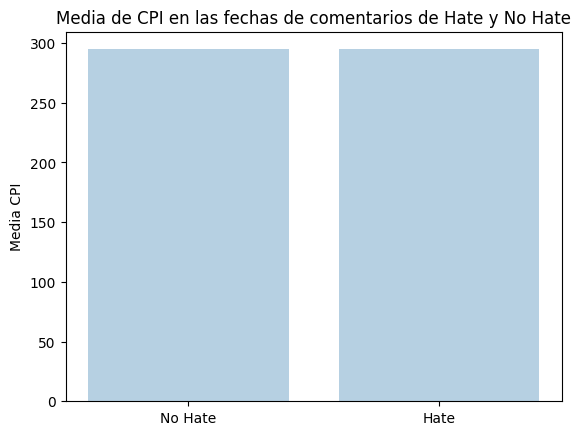

In [20]:
average_cpi = result_df.groupby('hate')['CPI'].mean()

color_bars = '#B6D0E2'

plt.bar(average_cpi.index, average_cpi.values, color=color_bars)
plt.xticks(average_cpi.index, ['No Hate', 'Hate'])

plt.xlabel(None)
plt.ylabel('Media CPI')
plt.title('Media de CPI en las fechas de comentarios de Hate y No Hate')
plt.show()

# Distribución de Hate en la última semana

In [21]:
fecha_inicio_semana = pd.to_datetime('2023-07-17')
fecha_fin_semana = pd.to_datetime('2023-07-23')
datos_ultima_semana = data[data['date_data'].between(fecha_inicio_semana, fecha_fin_semana)]

datos_ultima_semana

,comment_id,source_id,community_id,publication_id,date_data,hate,comment,day_of_week,Holiday,date_Y-M
2,2,5,pol,435021015,2023-07-19,1,"Democracy has consequences, chuds.",Wednesday,0,2023-07
3,3,5,pol,435020531,2023-07-19,0,Putin has been offered to repopulate Russia wi...,Wednesday,0,2023-07
4,4,5,pol,434992101,2023-07-19,0,"Young women are getting cervical cancer, cases...",Wednesday,0,2023-07
5,5,5,pol,435024423,2023-07-19,1,Is this the right place to post this?<br><span...,Wednesday,0,2023-07
6,6,5,pol,435023755,2023-07-19,1,"Previous:<a href=""/pol/thread/435019290#p43501...",Wednesday,0,2023-07
...,...,...,...,...,...,...,...,...,...,...
93939,93939,1,mrbeast,cExLQ1o2pDw,2023-07-17,0,ث,Monday,0,2023-07
93940,93940,1,mrbeast,cExLQ1o2pDw,2023-07-17,0,saya dari indonesia,Monday,0,2023-07
93941,93941,1,mrbeast,cExLQ1o2pDw,2023-07-17,0,0:03,Monday,0,2023-07
93942,93942,1,mrbeast,cExLQ1o2pDw,2023-07-17,0,Increible increible,Monday,0,2023-07


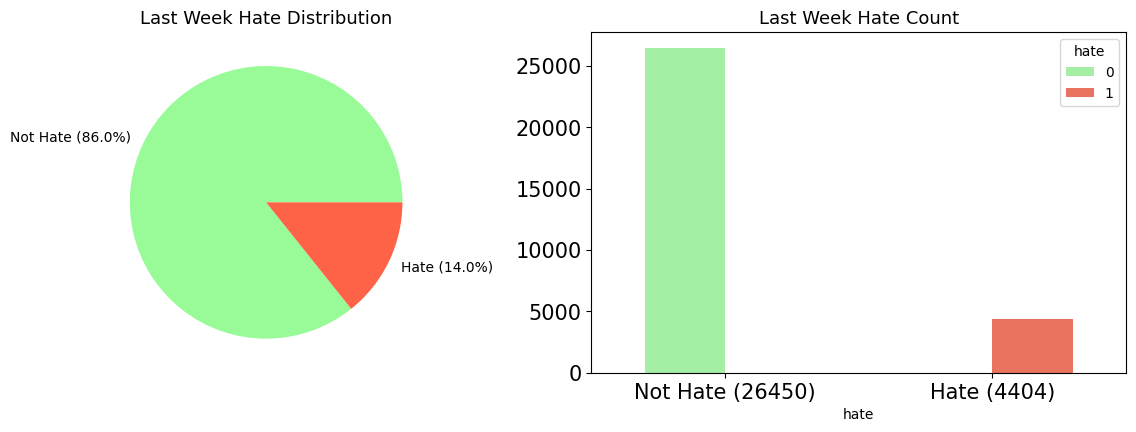

In [22]:
visualize_hate_distribution(datos_ultima_semana, 'Last Week Hate Distribution', 'Last Week Hate Count')

Comentarios de Hate de la última semana: 


Porcentaje: 

day_of_week
Friday       26.464435
Monday        8.823247
Saturday     25.837651
Sunday             NaN
Thursday     25.297828
Tuesday            NaN
Wednesday    24.310595
dtype: float64 



Numero Total: 

day_of_week
Friday        2868
Monday       20854
Saturday      2895
Sunday           4
Thursday      2854
Tuesday          1
Wednesday     1378
dtype: int64


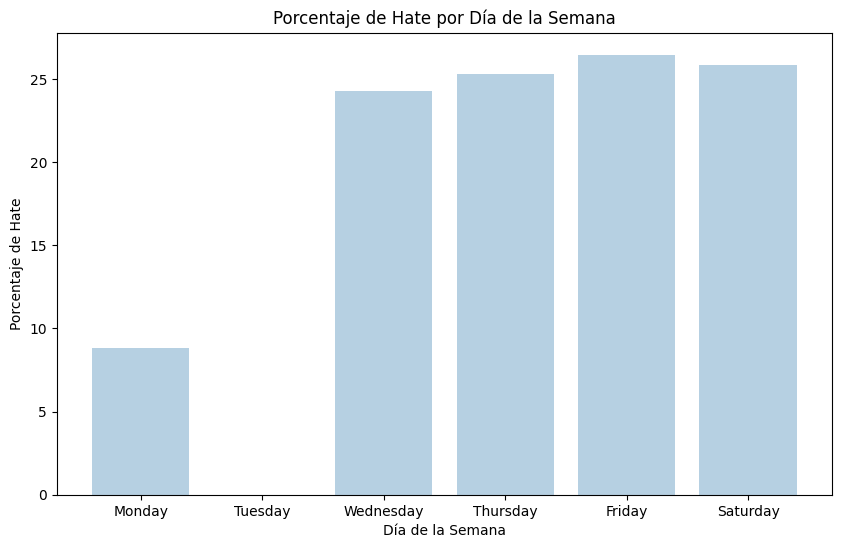

In [38]:
total_hate_comments_by_day = datos_ultima_semana[datos_ultima_semana['hate'] == 1].groupby('day_of_week').size()
total_comments_by_day = datos_ultima_semana.groupby('day_of_week').size()

percentage_hate_by_day = (total_hate_comments_by_day / total_comments_by_day) * 100

print("Comentarios de Hate de la última semana: \n\n")
print(f"Porcentaje: \n\n{percentage_hate_by_day} \n\n\n\nNumero Total: \n\n{total_comments_by_day}")

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
percentage_hate_by_day = percentage_hate_by_day.reindex(days_of_week)

color_bars = '#B6D0E2'

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(days_of_week, percentage_hate_by_day, color=color_bars)
ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Porcentaje de Hate')
ax.set_title('Porcentaje de Hate por Día de la Semana')

plt.show()